In [15]:
import matplotlib.pyplot as plt
import pandas as pd

## mpi weak scaling

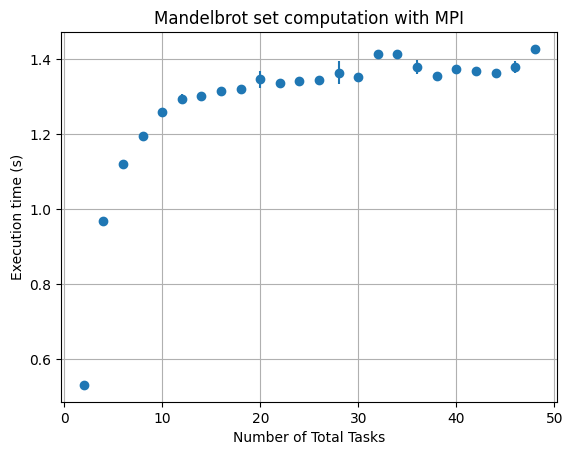

In [16]:
omp_times = pd.read_csv('mpi_weak_scaling.csv')

mean_times = omp_times.groupby('Total Tasks').mean()
std_times = omp_times.groupby('Total Tasks').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of Total Tasks')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with MPI')
plt.grid()
plt.show()

## mpi strong scaling

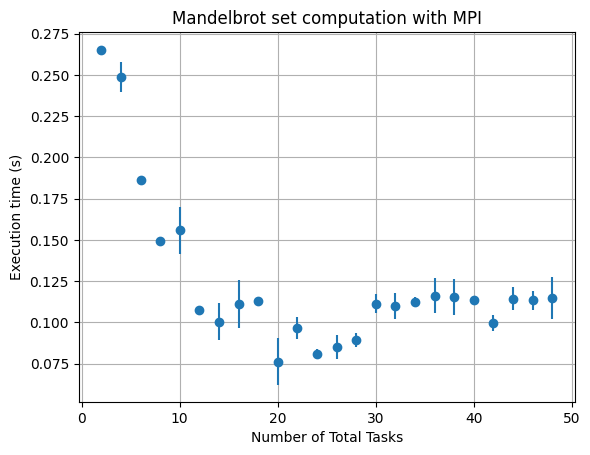

In [17]:
omp_times = pd.read_csv('mpi_strong_scaling.csv')

mean_times = omp_times.groupby('Total Tasks').mean()
std_times = omp_times.groupby('Total Tasks').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of Total Tasks')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with MPI')
plt.grid()
plt.show()

## omp weak scaling

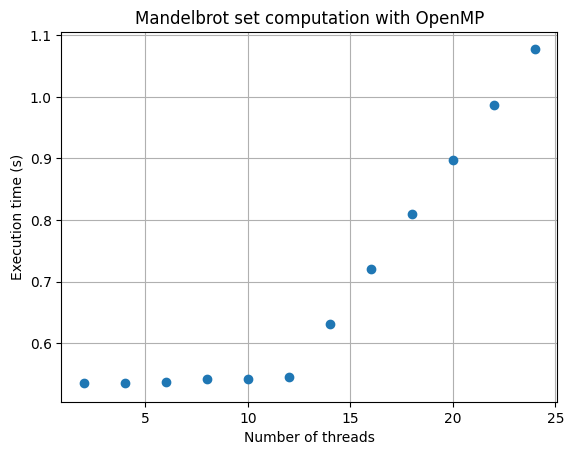

In [20]:
omp_times = pd.read_csv('omp_weak_scaling.csv')

mean_times = omp_times.groupby('Threads').mean()
std_times = omp_times.groupby('Threads').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with OpenMP')
plt.grid()
plt.show()

## omp strong scaling

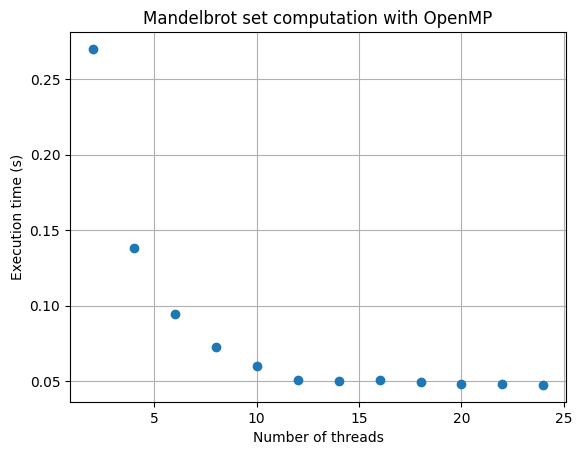

In [19]:
omp_times = pd.read_csv('omp_strong_scaling.csv')

mean_times = omp_times.groupby('Threads').mean()
std_times = omp_times.groupby('Threads').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with OpenMP')
plt.grid()
plt.show()